In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("SPOTIFY_DATASET.csv")
df.head() 

,artist_name,track_name,is_explicit,album_release_date,genres,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,popularity
0,Miley Cyrus,Flowers,False,2023-08-18,['pop'],0.706,0.632,0.691,-4.775,0.0584,0.000070,0.0232,0.0633,0,118.048,1,200600,4,94
1,SZA,Kill Bill,False,2022-12-08,"['pop', 'r&b', 'rap']",0.644,0.418,0.735,-5.747,0.0521,0.144000,0.1610,0.0391,8,88.980,1,153947,4,86
2,Harry Styles,As It Was,False,2022-05-20,['pop'],0.520,0.662,0.731,-5.338,0.3420,0.001010,0.3110,0.0557,6,173.930,0,167303,4,95
3,Jung Kook,Seven (feat. Latto) (Explicit Ver.),True,2023-11-03,['k-pop'],0.790,0.872,0.831,-4.185,0.3120,0.000000,0.0797,0.0440,11,124.987,1,183551,4,90
4,Eslabon Armado,Ella Baila Sola,False,2023-04-28,"['corrido', 'corridos tumbados', 'sad sierreno...",0.668,0.834,0.758,-5.176,0.4830,0.000019,0.0837,0.0332,5,147.989,0,165671,3,86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_name         50 non-null     object 
 1   track_name          50 non-null     object 
 2   is_explicit         50 non-null     bool   
 3   album_release_date  50 non-null     object 
 4   genres              50 non-null     object 
 5   danceability        50 non-null     float64
 6   valence             50 non-null     float64
 7   energy              50 non-null     float64
 8   loudness            50 non-null     float64
 9   acousticness        50 non-null     float64
 10  instrumentalness    50 non-null     float64
 11  liveness            50 non-null     float64
 12  speechiness         50 non-null     float64
 13  key                 50 non-null     int64  
 14  tempo               50 non-null     float64
 15  mode                50 non-null     int64  
 16  duration_m

In [4]:
df.describe()
# Basic description and overview of the data set that we are going to analyze

,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,popularity
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,0.662580,0.510740,0.659880,-6.012440,0.253332,0.020542,0.161280,0.083594,5.000000,124.069500,0.560000,200458.10000,3.900000,88.100000
std,0.123089,0.212346,0.121499,1.784443,0.222188,0.093655,0.091988,0.077913,3.522522,31.396557,0.501427,32580.81077,0.303046,5.690128
min,0.445000,0.131000,0.417000,-10.613000,0.001460,0.000000,0.023200,0.025600,0.000000,67.033000,0.000000,131013.00000,3.000000,72.000000
25%,0.559500,0.344000,0.556750,-7.126000,0.086275,0.000000,0.094675,0.038950,2.000000,97.963000,0.000000,176936.75000,4.000000,85.000000
50%,0.647500,0.507000,0.678000,-5.639000,0.164500,0.000012,0.121500,0.050950,5.000000,124.983500,1.000000,199740.00000,4.000000,89.000000
75%,0.776500,0.654500,0.736500,-4.877000,0.405500,0.000263,0.227000,0.081200,7.000000,138.059750,1.000000,228219.75000,4.000000,92.750000
max,0.911000,0.893000,0.965000,-2.810000,0.830000,0.634000,0.371000,0.333000,11.000000,203.759000,1.000000,272373.00000,4.000000,99.000000


In [5]:
df.isnull().sum()
# This will show us if there are any null values in the dataset or not

artist_name           0
track_name            0
is_explicit           0
album_release_date    0
genres                0
danceability          0
valence               0
energy                0
loudness              0
acousticness          0
instrumentalness      0
liveness              0
speechiness           0
key                   0
tempo                 0
mode                  0
duration_ms           0
time_signature        0
popularity            0
dtype: int64

In [6]:
df.duplicated().value_counts()

False    50
Name: count, dtype: int64

C:\Users\advik\AppData\Local\Temp\ipykernel_1664\1788300420.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Artist', data=df_top_5, legend=False,palette='Accent')


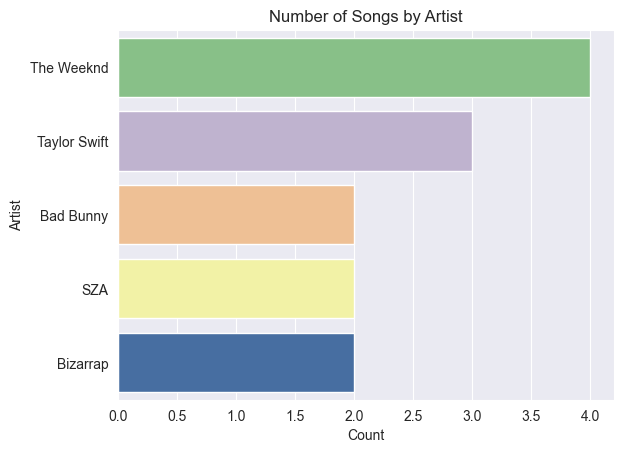

In [7]:
# Number of Tracks By Artist
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

sns.set_style('darkgrid')
# To make the code more visible in dark bacckgorunds and also a wide range of view in graphs



artist_counts = df['artist_name'].value_counts()
df_artist_counts = pd.DataFrame({'Artist': artist_counts.index, 'Count': artist_counts.values})
df_top_5 = df_artist_counts.head(5)

sns.barplot(x='Count', y='Artist', data=df_top_5, legend=False,palette='Accent')
plt.title('Number of Songs by Artist')

plt.show()

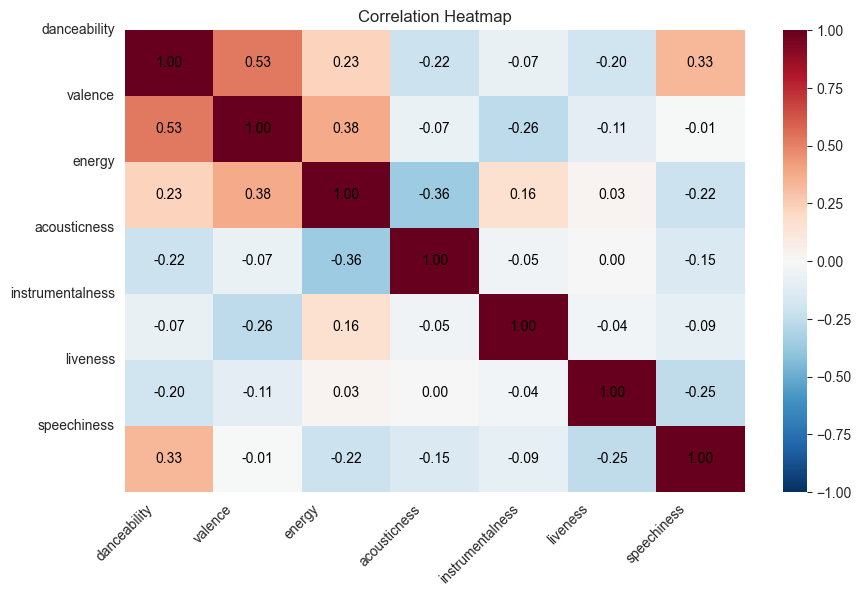

In [8]:
track_attributes = ['danceability','valence','energy','acousticness','instrumentalness','liveness','speechiness',]

correlation_matrix = df[track_attributes].corr()

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation_matrix,vmin=-1,vmax=1,cmap='RdBu_r')

# Loop to add correlation values in each cell
for i in range(len(track_attributes)):
    for j in range(len(track_attributes)):
        text = "{:.2f}".format(correlation_matrix.iloc[i, j])
        heatmap.text(j + 0.5, i + 0.5, text,ha='center', va='center', color='black')

plt.xticks(range(len(track_attributes)), track_attributes, rotation=45)
plt.yticks(range(len(track_attributes)), track_attributes, rotation=0)
plt.title("Correlation Heatmap")
plt.show()


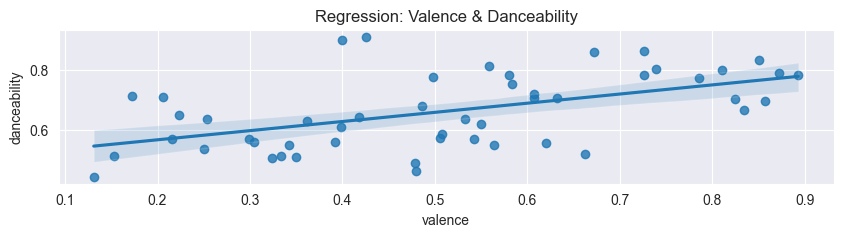

In [9]:
plt.figure(figsize=(10,2))
sns.regplot(x='valence',y='danceability',data=df)
plt.title("Regression: Valence & Danceability")

plt.show()

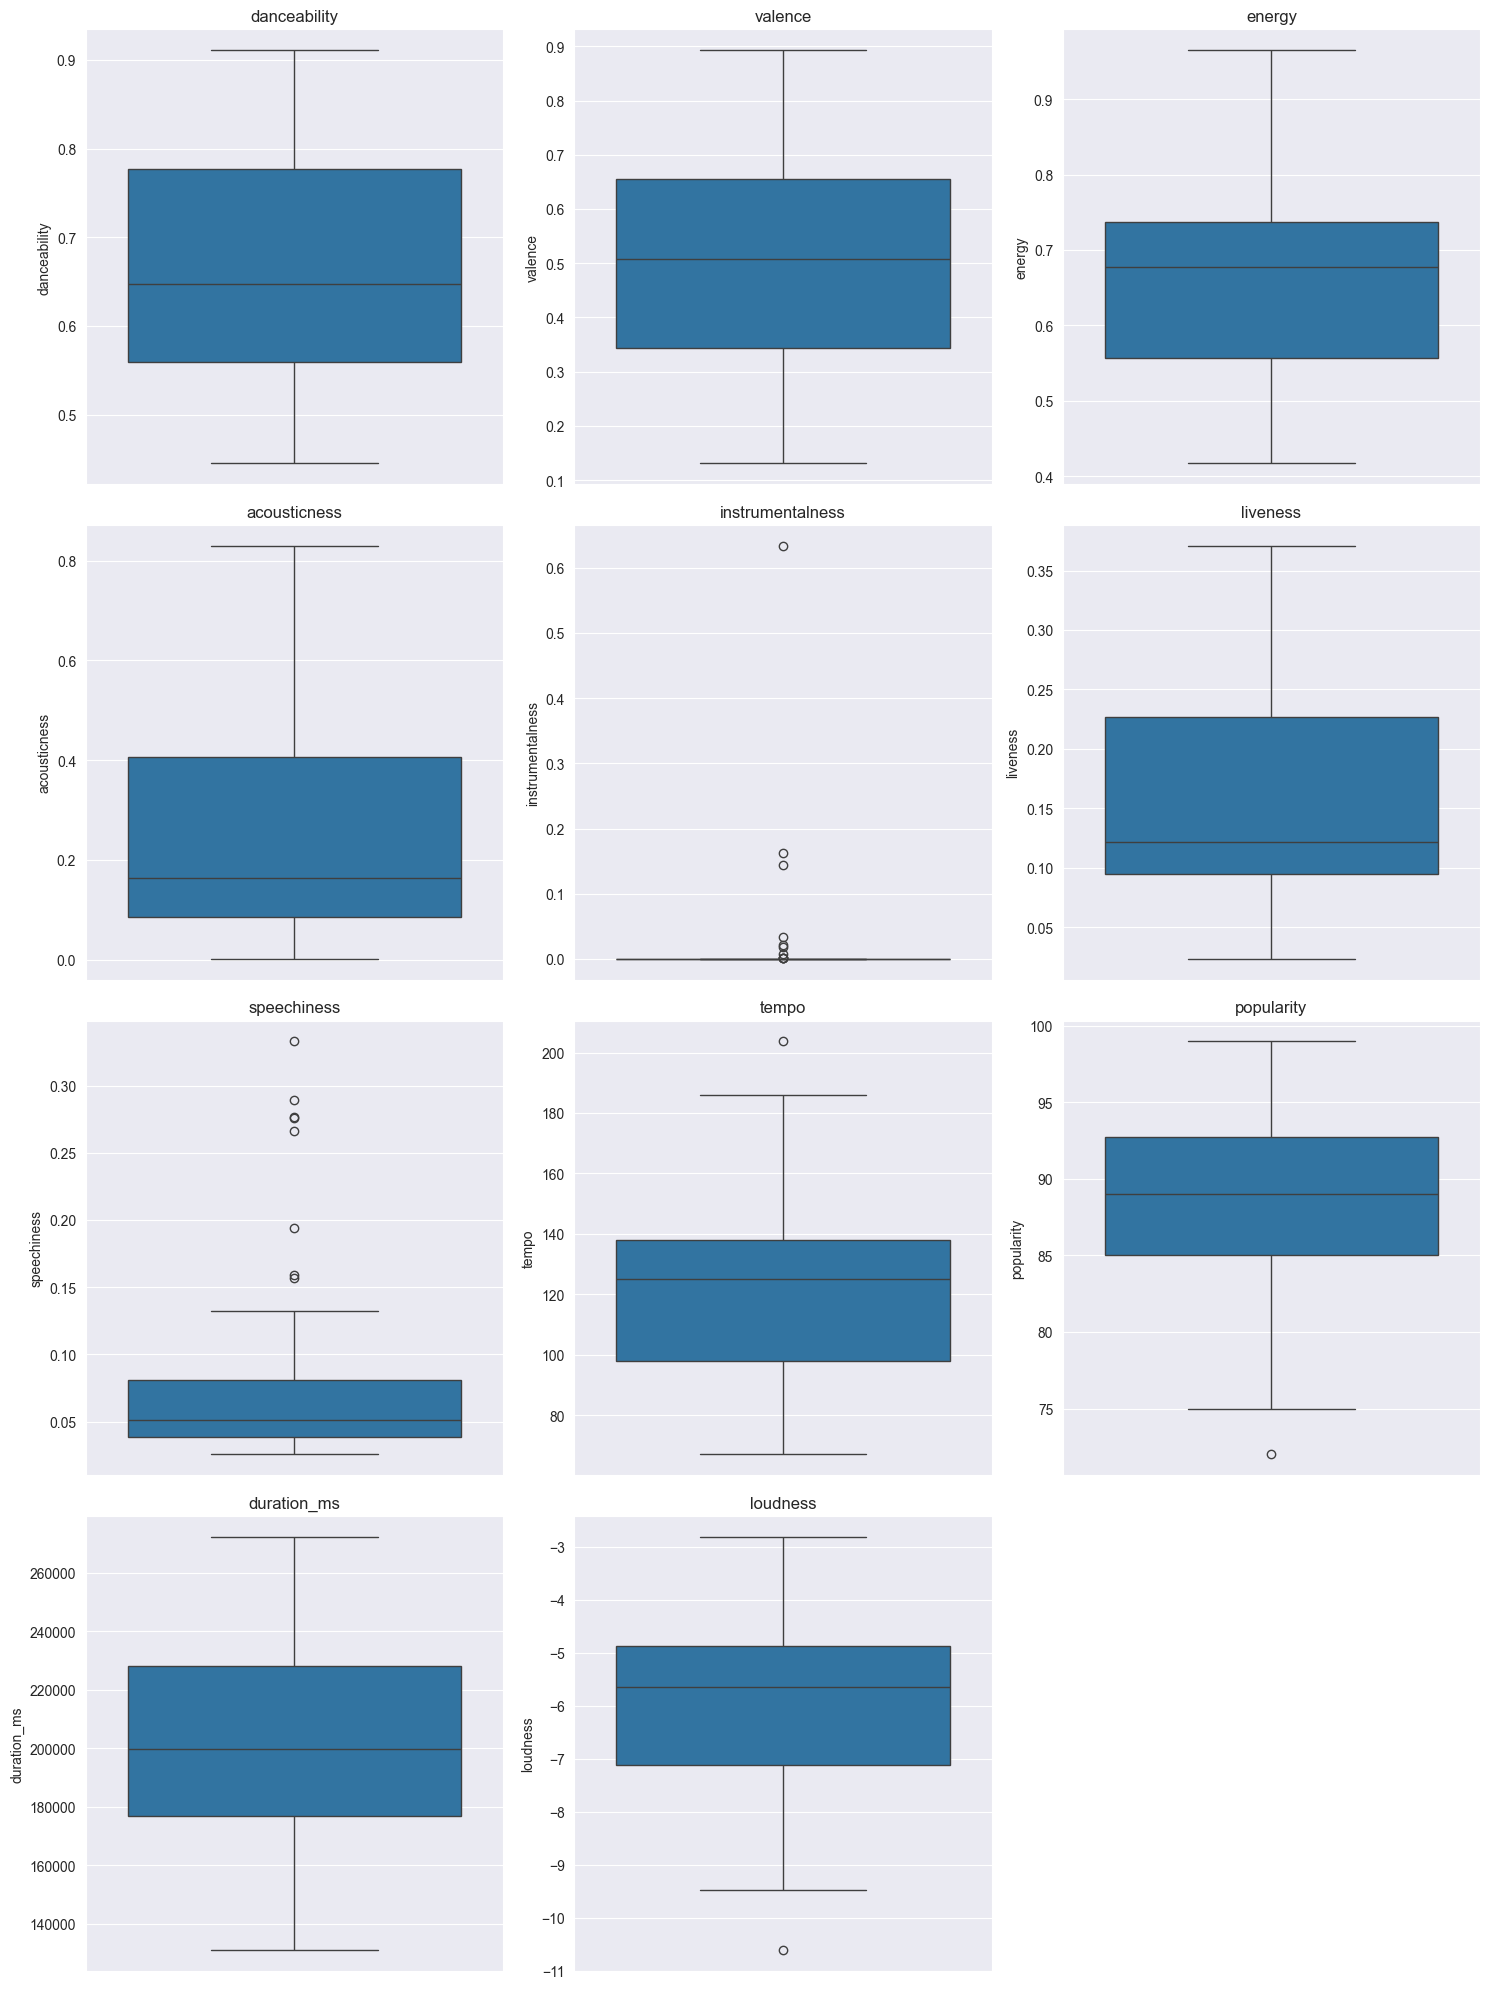

In [10]:
numerical_vars = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'popularity', 'duration_ms', 'loudness']

n = len(numerical_vars)
ncols = 3  
# the number of columns for your subplots

nrows = n // ncols + (n % ncols > 0)  
# Calculate rows needed, add an extra row if there are leftovers

# Create a figure to contain the subplots
plt.figure(figsize=(15, 5 * nrows))

for i, var in enumerate(numerical_vars, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(y=df[var])
    plt.title(var)
    
plt.tight_layout()
plt.show()


In [11]:
key_mapping = {0: 'C',1: 'C#', 2: 'D',  3: 'D#',  4: 'E', 5: 'F', 6: 'F#',7: 'G', 8: 'G#', 9: 'A',10: 'A#',11: 'B'}
df['key'] = df['key'].map(key_mapping)
df.head()

,artist_name,track_name,is_explicit,album_release_date,genres,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,popularity
0,Miley Cyrus,Flowers,False,2023-08-18,['pop'],0.706,0.632,0.691,-4.775,0.0584,0.000070,0.0232,0.0633,C,118.048,1,200600,4,94
1,SZA,Kill Bill,False,2022-12-08,"['pop', 'r&b', 'rap']",0.644,0.418,0.735,-5.747,0.0521,0.144000,0.1610,0.0391,G#,88.980,1,153947,4,86
2,Harry Styles,As It Was,False,2022-05-20,['pop'],0.520,0.662,0.731,-5.338,0.3420,0.001010,0.3110,0.0557,F#,173.930,0,167303,4,95
3,Jung Kook,Seven (feat. Latto) (Explicit Ver.),True,2023-11-03,['k-pop'],0.790,0.872,0.831,-4.185,0.3120,0.000000,0.0797,0.0440,B,124.987,1,183551,4,90
4,Eslabon Armado,Ella Baila Sola,False,2023-04-28,"['corrido', 'corridos tumbados', 'sad sierreno...",0.668,0.834,0.758,-5.176,0.4830,0.000019,0.0837,0.0332,F,147.989,0,165671,3,86


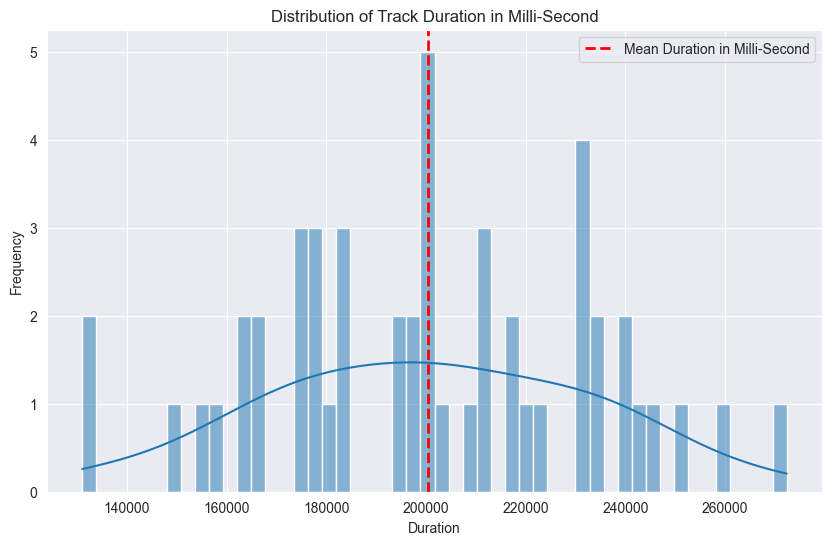

In [12]:

plt.figure(figsize=(10,6))

sns.histplot(df['duration_ms'], bins=50, kde=True)
plt.axvline(x=df['duration_ms'].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean Duration in Milli-Second")

plt.title('Distribution of Track Duration in Milli-Second')
plt.xlabel('Duration')
plt.ylabel('Frequency')

plt.legend()
plt.show()

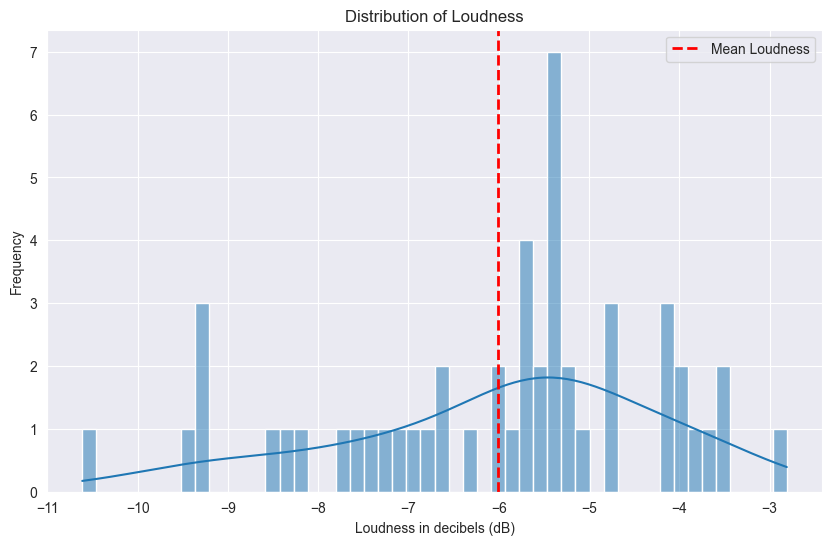

In [13]:
plt.figure(figsize=(10,6))

sns.histplot(df['loudness'], bins=50, kde=True)
plt.axvline(x=df['loudness'].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean Loudness")

plt.title('Distribution of Loudness')
plt.xlabel('Loudness in decibels (dB)')
plt.ylabel('Frequency')

plt.legend()
plt.show()

C:\Users\advik\AppData\Local\Temp\ipykernel_1664\3659731601.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mode',data=df,palette='viridis',order=df['mode'].value_counts().index)


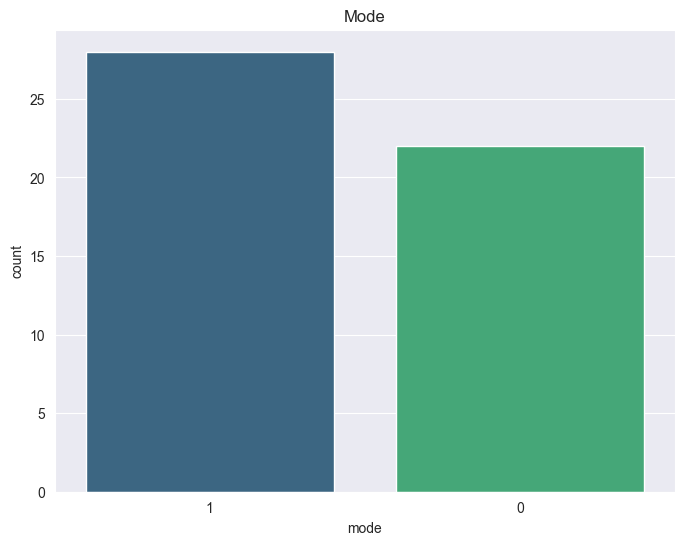

In [14]:
plt.figure(figsize=(8,6))

sns.countplot(x='mode',data=df,palette='viridis',order=df['mode'].value_counts().index)

plt.title('Mode')

plt.show()

In [15]:

import ast

# Deserialize with ast.literal_eval
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))
# Flatten the list of genres and count freqencies
all_genres = [genre for sublist in df['genres'] for genre in sublist]
print(all_genres)

['pop', 'pop', 'r&b', 'rap', 'pop', 'k-pop', 'corrido', 'corridos tumbados', 'sad sierreno', 'sierreno', 'pop', 'rap', 'afrobeats', 'nigerian pop', 'argentine hip hop', 'pop venezolano', 'trap argentino', 'trap latino', 'urbano latino', 'pop', 'garage rock', 'modern rock', 'permanent wave', 'rock', 'sheffield indie', 'reggaeton', 'reggaeton colombiano', 'trap latino', 'urbano latino', 'reggaeton', 'urbano mexicano', 'big room', 'dance pop', 'edm', 'pop', 'pop dance', 'canadian contemporary r&b', 'canadian pop', 'pop', 'musica chihuahuense', 'pop', 'uk pop', 'colombian pop', 'latin pop', 'reggaeton', 'reggaeton colombiano', 'trap latino', 'urbano latino', 'bedroom pop', 'gen z singer-songwriter', 'singer-songwriter pop', 'chill pop', 'canadian contemporary r&b', 'canadian pop', 'pop', 'latin hip hop', 'reggaeton', 'trap latino', 'urbano latino', 'k-pop girl group', 'canadian contemporary r&b', 'canadian pop', 'pop', 'piano rock', 'pop', 'bedroom pop', 'contemporary country', 'modern ind

In [16]:
genre_counts = pd.Series(all_genres).value_counts()
df_genres = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})
print(df_genres)



                        Genre  Count
0                         pop     17
1               urbano latino     10
2                 trap latino     10
3                   reggaeton      9
4                         rap      5
5   canadian contemporary r&b      4
6                canadian pop      4
7        reggaeton colombiano      3
8                 bedroom pop      3
9                sad sierreno      3
10          corridos tumbados      3
11                      k-pop      3
12           k-pop girl group      2
13                     uk pop      2
14    gen z singer-songwriter      2
15                        r&b      2
16                  dance pop      2
17              colombian pop      2
18      singer-songwriter pop      2
19             trap argentino      2
20             pop venezolano      2
21                    corrido      2
22                   sierreno      2
23                modern rock      2
24                    hip hop      2
25          argentine hip hop      2
2

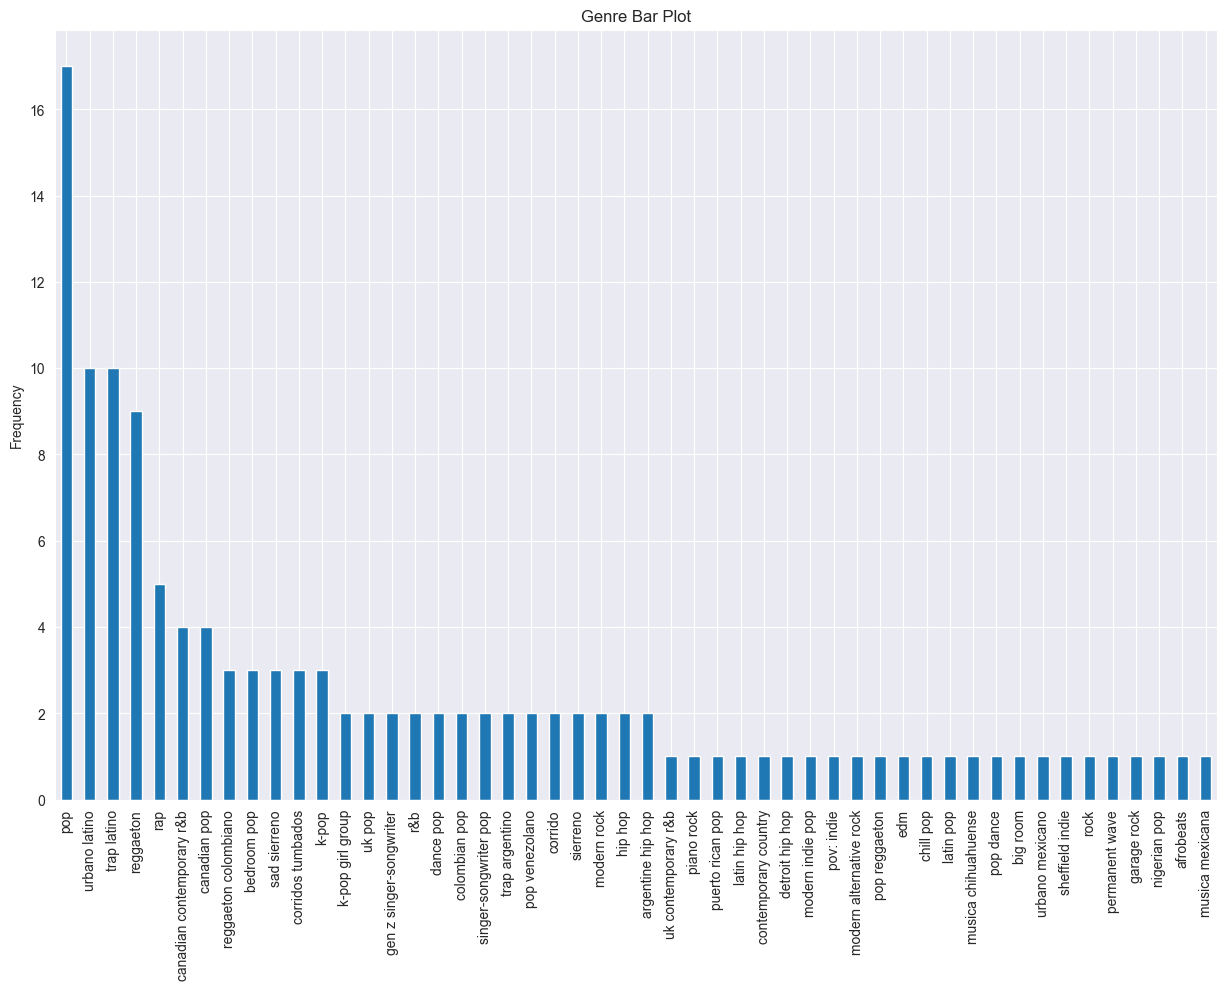

In [17]:

genre_counts.plot(kind='bar', figsize=(15,10))
plt.title('Genre Bar Plot')
plt.ylabel('Frequency')

plt.show()

is_explicit
False    28
True     22
Name: count, dtype: int64


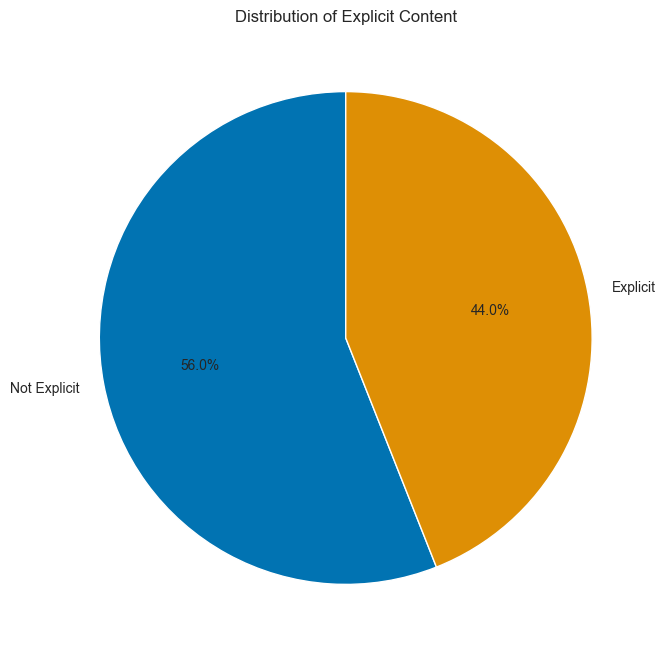

In [18]:
explicit_counts = df['is_explicit'].value_counts()
print(explicit_counts)

colorblind_palette = sns.color_palette("colorblind")

plt.figure(figsize=(8,8))
plt.pie(explicit_counts, 
        labels=['Not Explicit', 'Explicit'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colorblind_palette[:2])
plt.title("Distribution of Explicit Content")

plt.show()

In [19]:
mean_values_top_50 = df[['danceability',
    'valence',
    'energy',
    'acousticness',
    'instrumentalness',
    'liveness',
    'speechiness',]].median()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=mean_values_top_50,
    theta=['danceability',
    'valence',
    'energy',
    'acousticness',
    'instrumentalness',
    'liveness',
    'speechiness',],
    fill='toself',
    name='Top 50',
    line=dict(color='pink'),
))

fig.update_layout(
            polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
            showlegend=True,
            title='Top 50 songs are energetic, positive and dancable'
        )

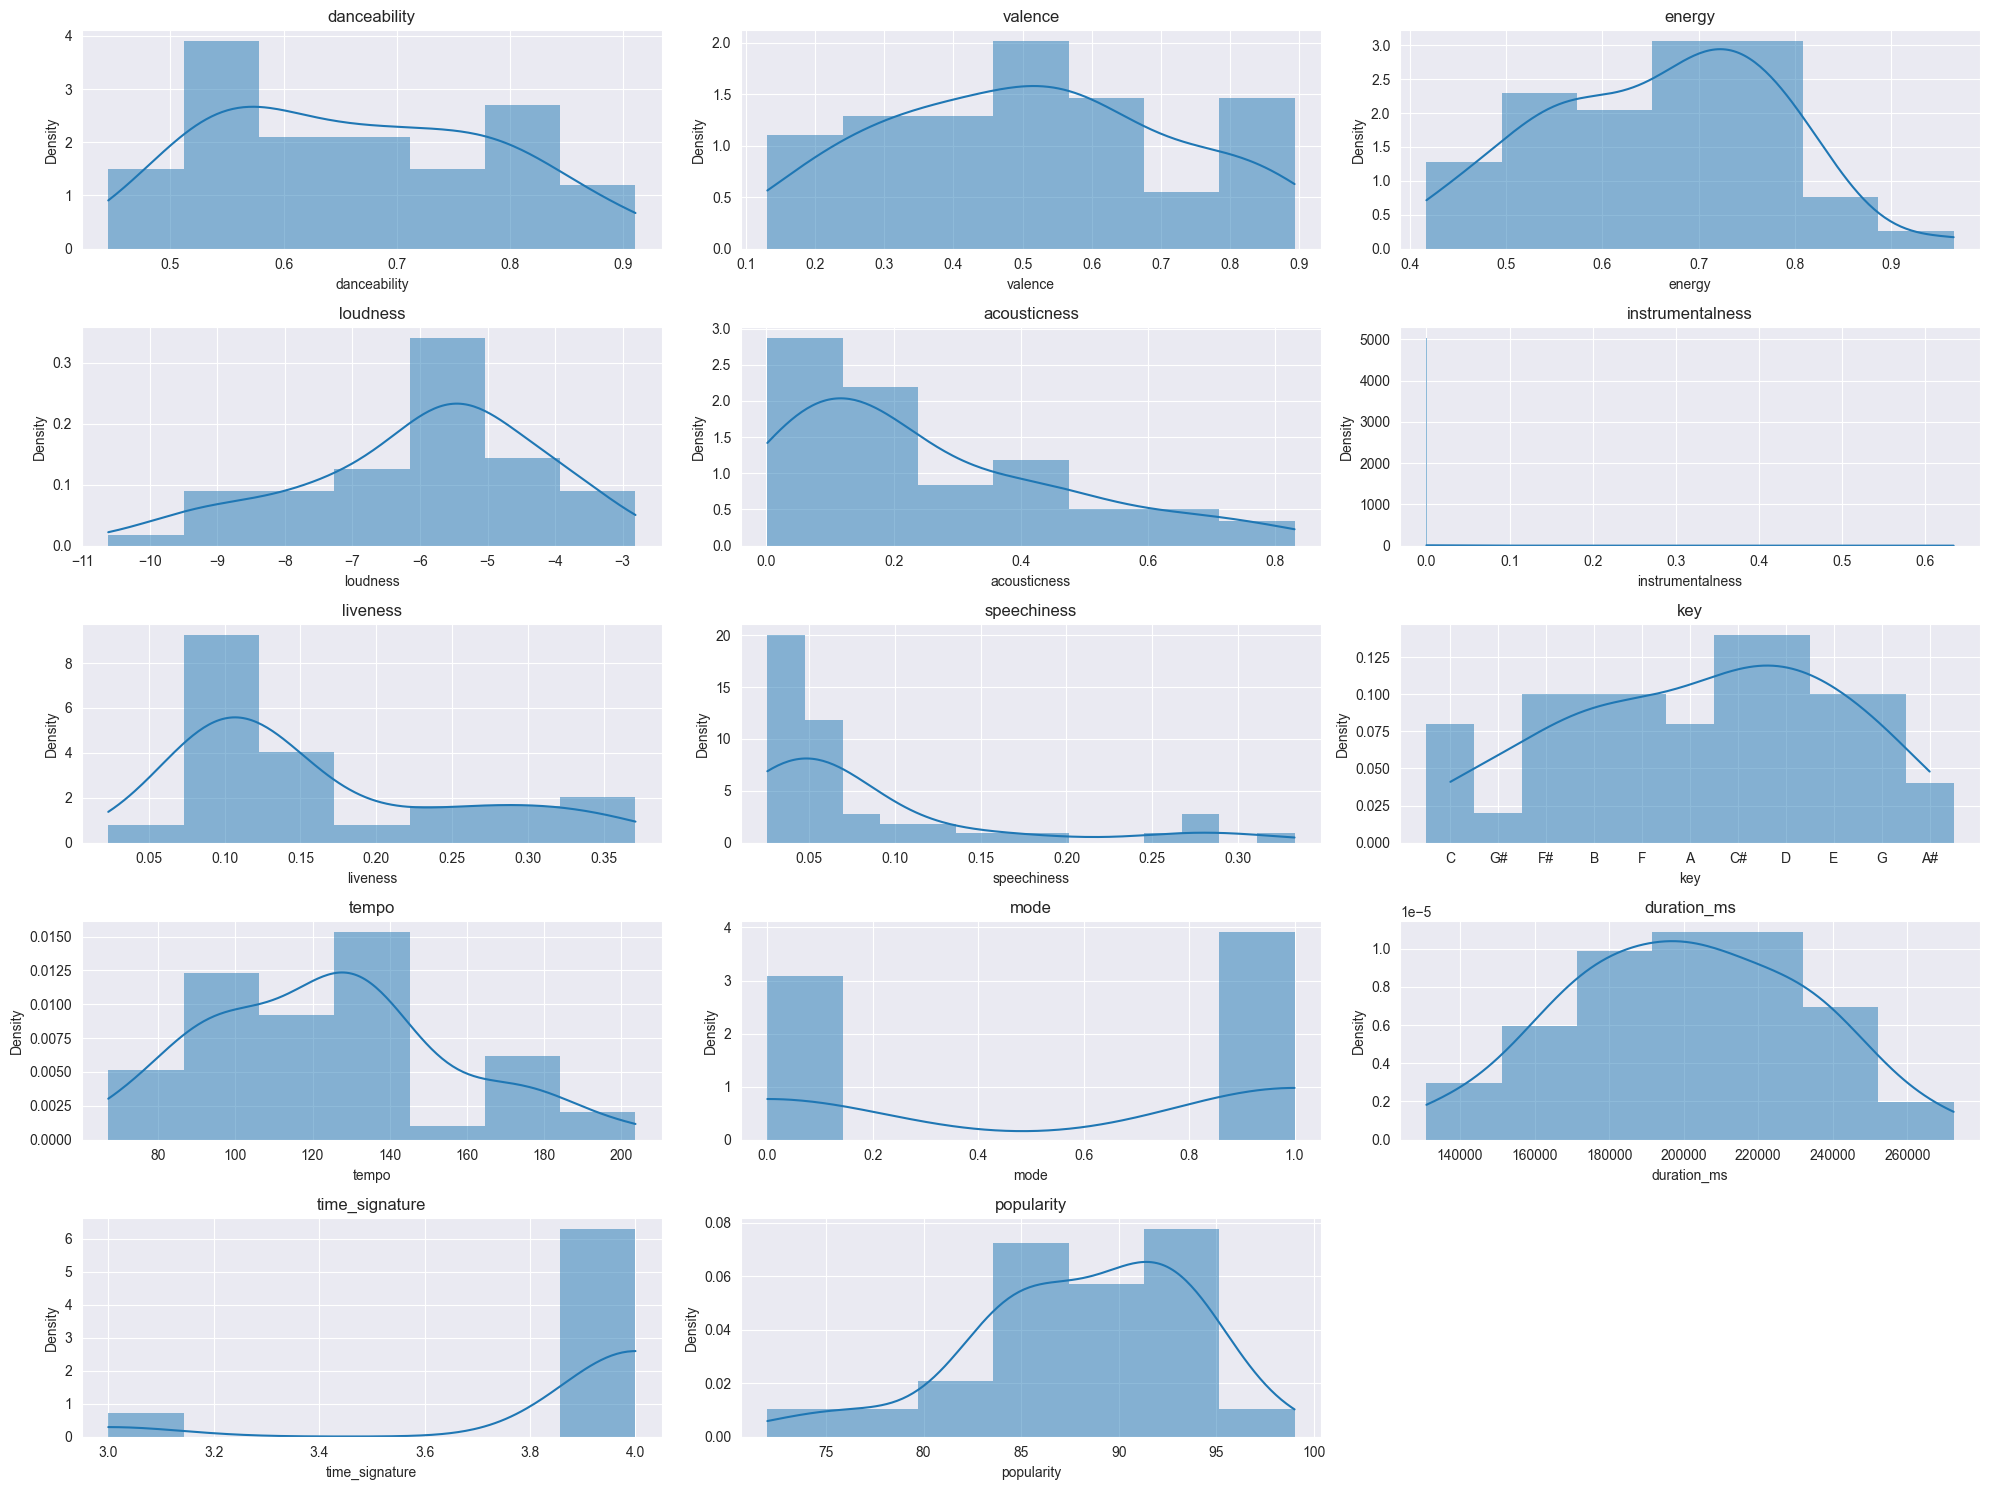

In [20]:
variables = [
    'danceability', 'valence', 'energy', 'loudness', 'acousticness',
    'instrumentalness', 'liveness', 'speechiness', 'key', 'tempo',
    'mode', 'duration_ms', 'time_signature', 'popularity'
]

plt.figure(figsize=(20, 15))
for i, var in enumerate(variables, 1):
    plt.subplot(5, 3, i)  
    sns.histplot(df[var], kde=True, stat="density", linewidth=0)
    plt.title(var)

plt.tight_layout()
plt.show()

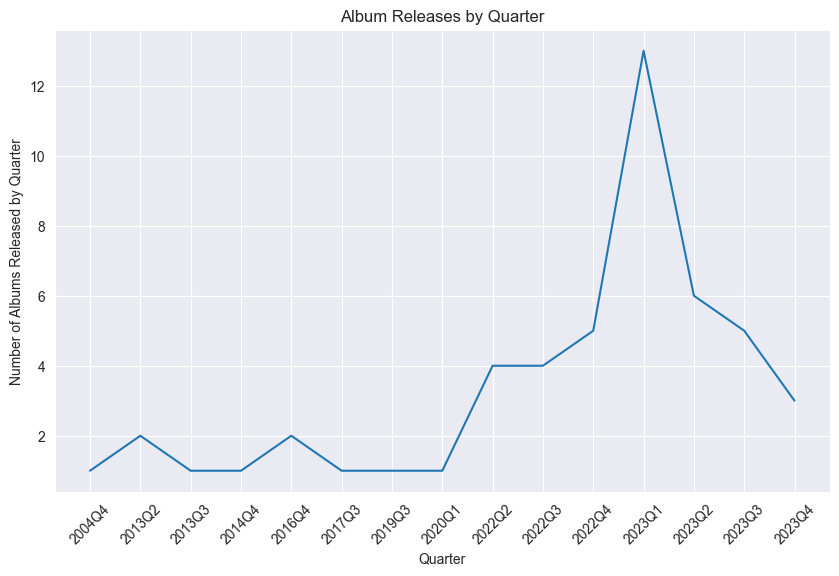

In [21]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'])
df['release_quarter'] = df['album_release_date'].dt.to_period('Q').astype(str)

# Aggregate data: For example, count number of albums per quarter
quarterly_counts = df.groupby('release_quarter')['popularity'].count()

# Ensure the index is sorted; this relies on the quarters being in a sortable format
quarterly_counts = quarterly_counts.sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=quarterly_counts.index, y=quarterly_counts.values)
plt.xticks(rotation=45)
plt.title('Album Releases by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Albums Released by Quarter')
plt.grid(True)
plt.show()